# <div style='text-align:center; font-size:40px'>Desafio 6: Python Para Data Science</div>


<ol>
    <li>
        Ler Json de entrada do object storage
        Criar 3 funções diferentes que mostrem as entradas ordenadas por:
        Data;
        Nome;
        Valor; <br><br>
    </li>
    <li>
        Dada uma entrada CSV do object storage
        Criar uma função mostre o conteúdo do CSV sem repetições em ordem alfabética
        Python Local<br><br>
    </li>
    <li>
        Criar um programa que receba a entrada do usuário, pedindo a(s) resposta(s) para a função $x^2+ 2x - 20$ e envie a mensagem “Parabéns” caso o usuário tenha acertado, caso contrário envie “Essa não é bem a resposta, o correto é $x_1$ e $x_2$"
    </li>

# <div style='font-size:25px; color:#3a63a6'>Inicio da parte 1</div>

Para usar o arquivo JSON primeiro é preciso importar algumas ferramentas e conectar ao Object Storage, só então o JSON é transformado em um dataframe.

In [1]:
import types 
import pandas as pd 
from botocore.client import Config 

import ibm_boto3 

def __iter__(self): return 0 

# @hidden_cell 
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials. 
# You might want to remove those credentials before you share the notebook. 
client_4a01f471213a4910828592f81bb9528f = ibm_boto3.client(service_name='s3', 
    ibm_api_key_id='vExLh4erPkj99za1SWnoaI81M9T7YRVRkS-8tpzUf1Yl',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token", 
    config=Config(signature_version='oauth'), 
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com') 

body = client_4a01f471213a4910828592f81bb9528f.get_object(Bucket='chgln-donotdelete-pr-pzfhxoaf29f0oj',Key='data.json')['Body'] 
# add missing __iter__ method, so pandas accepts body as file-like object 

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face an error during data loading. 
# Please read the documentation of 'pandas.read_json()' and 'pandas.io.json.json_normalize' to learn more about the possibilities to adjust the data loading. 
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader 
# and http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html 

df_data_1 = pd.read_json(body, orient='values') 

As funções são bem simples, elas apenas retornam o dataframe recebido conforme o parametro de cada uma.

In [2]:
def jsondate(json):
    return json.sort_values(["date"])

def jsonname(json):
    return json.sort_values(["name"])

def jsonvalue(json):
    return json.sort_values(["value"])

O usuário pode escolher o que vai ordenar no momento, quantas vezes ele desejar.

In [3]:
while(True):

    escolha = input("Deseja ordenar por:\n1.Data \n2.Nome \n3.Valor\n4.Deixar de ordenar\n")

    if(escolha == '1'):
        print("\nOrdenado por data:\n")
        df_data_1 = jsondate(df_data_1)

    elif(escolha == '2'):
        df_data_1 = jsonname(df_data_1)
        print("\nOrdenado por nome:\n")

    elif(escolha == '3'):
        df_data_1 = jsonvalue(df_data_1)
        print("\nOrdenado por valor\n")
        
    elif(escolha == '4'):
        break;
    
    else:
        print('\nEscolha uma opção correta')
        continue;


    print(df_data_1)

Deseja ordenar por:
1.Data 
2.Nome 
3.Valor
4.Deixar de ordenar
1

Ordenado por data:

         date         name  value
16 2018-11-23       Culver  68.38
15 2018-11-24        Xenia  43.61
0  2018-12-12       Kimble  93.28
10 2019-01-13     Kristine  26.09
24 2019-01-27   Christabel  73.09
13 2019-02-03     Claudine  26.28
8  2019-02-14        Graig  79.75
1  2019-03-08       Alanna  10.51
5  2019-03-21         Isac   5.21
4  2019-03-23        Pedro  98.77
14 2019-04-07      Honoria  93.40
6  2019-04-10        Gayla  40.03
20 2019-04-11      Jackson  53.92
17 2019-05-14       Paddie  99.52
23 2019-05-25         Jack  87.38
22 2019-06-18     Christie  83.61
3  2019-07-28       Rustin  47.94
19 2019-08-02        Tadio   4.40
18 2019-08-17         Livy  51.81
12 2019-08-21         Teri  22.17
2  2019-10-09          Jay  29.41
11 2019-10-10      Brenden  41.40
7  2019-10-16      Ransell  80.89
21 2019-10-19        Elise  35.62
9  2019-10-21  Jacquenetta  97.73
Deseja ordenar por:
1.Data 
2

<br>

# <div style='font-size:25px;color:#3a63a6'>Inicio da parte 2</div>

Como o necessário já foi importado, é necessário apenas conectar ao Object Storage e criar o dataframe. <br>
Por fim só há uma função a ser ordenada e printada.

In [4]:
body = client_4a01f471213a4910828592f81bb9528f.get_object(Bucket='chgln-donotdelete-pr-pzfhxoaf29f0oj',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object 
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) 
    
df2 = pd.read_csv(body) 

In [5]:
def csvorder(csv):
    return csv.sort_values(by=['name'])

In [6]:
df2 = csvorder(df2)
print(df2)

           name
73     Adrianne
74        Alene
46   Alessandro
20       Alfons
99      Anthony
75        Armin
51      Artemis
41        Berne
90        Bunni
35         Calv
4         Candi
92       Carlyn
67       Caspar
79     Christie
80       Cindie
29     Clarence
12     Clarisse
85         Codi
60  Constantino
84   Cristionna
97        Daffi
21        Daune
13        Druci
22    Ellswerth
34        Elora
62    Fanchette
89        Fanya
5        Farica
59        Gaile
6       Garrard
..          ...
82        Perle
57   Philippine
23       Portia
14      Rafaela
33    Reginauld
11        Reine
72      Reinold
47        Retha
30      Riobard
1      Robinett
0           Rog
58      Rozelle
3        Rutter
53       Shandy
25        Slade
49       Sorcha
2        Stacee
76       Steven
61         Sven
40       Tandie
71       Tanney
48        Tasha
18      Theresa
7         Venus
26        Verne
28        Vevay
52      Whitney
86      William
15        Wolfy
87        Zarah

[100 ro

# <div style='font-size:25px; color:#3a63a6'>Inicio da parte 3</div>

Ficamos em dúvida se o que foi pedido e tomamos dois caminhos: <br>
<ol>
    <li>É uma função, onde o usuário insere um valor e o resultado é cálculado e comparado.<br></li>
    <li>É uma equação de segundo grau com dois resultados e o usuário insere as raízes que são comparadas com o valor real <br></li>
</ol>
Na dúvida acabei fazendo os dois como funções e o usuário seleciona qual delas vai executar, assim como na parte 1 desse desafio.

Foram cradas quatro funções. A para calcular a função $y(x)$, a para calcular a equação, bháskara necessário para descobrir as raízes da equação, e para plotar o gráfico da função.

In [7]:
def funcao():
    valorx = float(input("Digite o valor desejado: "))
    resCorrect = pow(valorx, 2) + 2*valorx - 20
    resUser = float(input("Digite o valor de f(x) que você calculou para essa função: "))


    if(resCorrect == resUser):
        print("Parabéns, você está certo!")
    else:
        print("Ops, parece que você não está correto :(")
        print("O resultado é {}".format(resCorrect))

Para o segundo modo eu primeiro calculo as raízes que satisfazem a equação $x^2+2x-20 = 0$. <br>
Então é pedido os valores ao usuário e vericado se ele está correto. Caso esteja correto o gráfico é printado.

In [8]:
def bhaskara(a, b, c):
    import math 
    
    delta = math.sqrt(pow(b,2)- (4*a*c))

    return [round(((-b - delta)/2), 3), round((-b + delta)/2, 3)]

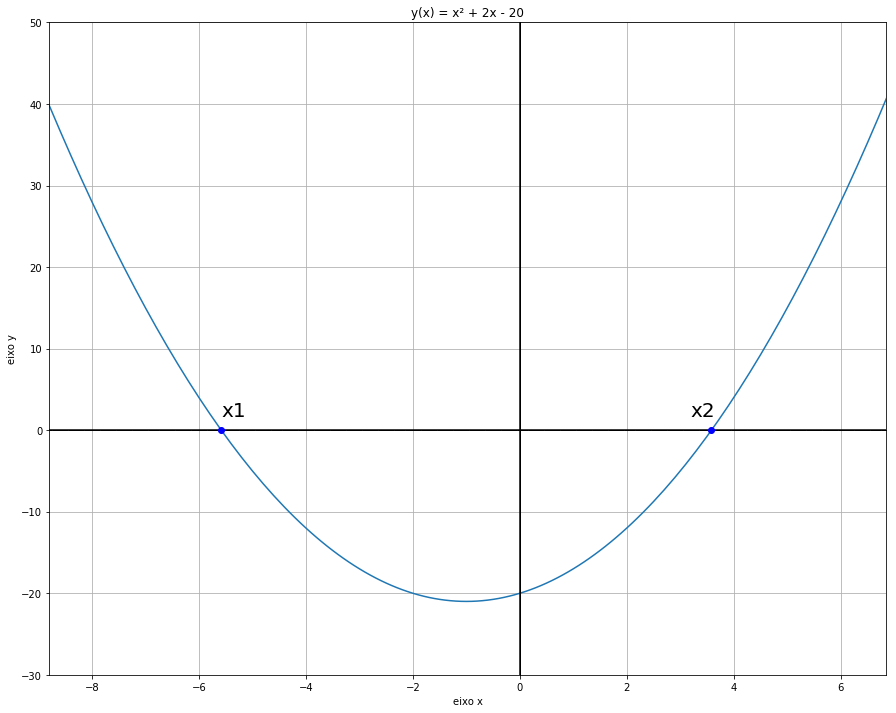

In [114]:

import numpy as np 
import matplotlib.pyplot as plt  

xmin = -8.8
xmax = 6.85
ymin = -30
zmax = 50

x = np.arange(-10, 8, 0.1) 
y = pow(x, 2) + 2*x - 20

plt.figure(figsize=(15, 12))

plt.title("y(x) = x² + 2x - 20") 

ax1 = np.arange(-30, 50, 0.1)
ax2 = 0*ax1


plt.plot(x, y)
plt.plot(ax1, ax2, color='k', marker='_')
plt.plot(ax2, ax1, color='k', marker='|')

plt.plot(-5.583, 0, 'ob')
plt.plot(3.583, 0, 'ob')
plt.text(-5.583, 1.7, 'x1', fontsize='20')
plt.text(3.183, 1.7, 'x2', fontsize='20')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.grid()

plt.xlabel('eixo x')
plt.ylabel('eixo y')

plt.show() 

In [9]:
def equacao():
    
    x1 = bhaskara(1, 2, -20)[0]
    x2 = bhaskara(1, 2, -20)[1]

    while(True):
        numRoot = input("Há quantas raízes para essa equação? ")

        if(numRoot != '2'):
            print("Hmmm o número de raízes não é esse.")
            continue
        else:
            break


    valor1 = round(float(input("Digite a primeira raíz com 3 casas de precisão: ").replace(",", ".")), 3)
    valor2 = round(float(input("Digite a segunda raíz com 3 casas de precisão: ").replace(",", ".")), 3)

    if(valor1==x1 and valor2==x2) or (valor1==x2 and valor2==x1):
        print("Você está correto.")
    else:
        print("A resposta não parece estar correta, na verdade a resposta é {:.3f} e {:.3f}".format(x1, x2))

Então agora que as funções estão feitas, basta perguntar para o usuário o que ele quer fazer.

In [12]:
opcao = input("Você deseja fazer: \n1.Uma função \n2.Uma equação\n")
if opcao == '1' or opcao.lower() == 'um':
    print("\nEntão vamos à função! ")
    funcao()
elif opcao == '2' or opcao.lower() == 'dois':
    print("\nEntão vamos à equação! ")
    equacao()
else:
    print("Por favor, selecione 1 ou 2.")

Você deseja fazer: 
1.Uma função 
2.Uma equação
2

Então vamos à equação! 
Há quantas raízes para essa equação? 2
Digite a primeira raíz com 3 casas de precisão: 3,5833
Digite a segunda raíz com 3 casas de precisão: -5,5826
Você está correto.


<div style='font-size:25px; color:#3a63a6'>FINITO</div><br>
<div style='font-size:15px; color:#a3a3a3'>gg easy</div>